In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin

In [464]:
class myLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoders = {}  # Dictionary to store LabelEncoders for each column

    def fit(self, X, y=None):
        """
        Fit LabelEncoders on the input data.

        Parameters:
            X (DataFrame): Input data to fit the LabelEncoders.
            y : Ignored. Present for compatibility with scikit-learn.

        Returns:
            self : Returns the instance of the transformer.
        """
        for c in X.columns:
            self.encoders[c] = LabelEncoder()  # Create a new LabelEncoder for each column
            self.encoders[c].fit(X[c])  # Fit the LabelEncoder on the column data
        return self

    def transform(self, X, y=None):
        """
        Transform the input data using the fitted LabelEncoders.

        Parameters:
            X (DataFrame): Input data to be transformed.
            y : Ignored. Present for compatibility with scikit-learn.

        Returns:
            X_out (DataFrame): Transformed data with categorical columns replaced by numeric values.
        """
        X_out = pd.DataFrame()  # Create an empty DataFrame to store the transformed data
        for c in X.columns:
            X_out[c] = self.encoders[c].transform(X[c])  # Transform each column using the respective LabelEncoder
        return X_out

In [465]:
df = pd.read_csv('mamíferos.txt', delimiter='\t')  
df = df.dropna()  
df.head(20)

,Animal,Da a luz,Vuela,Vive en el agua,Tiene piernas,Mamífero
0,humano,sí,no,no,sí,mamífero
1,pitón,no,no,no,no,no-mamífero
2,salmón,no,no,sí,no,no-mamífero
3,ballena,sí,no,sí,no,mamífero
4,rana,no,no,a veces,sí,no-mamífero
5,dragón de komodo,no,no,no,sí,no-mamífero
6,murciélago,sí,sí,no,sí,mamífero
7,paloma,no,sí,no,sí,no-mamífero
8,gato,sí,no,no,sí,mamífero
9,tiburón leopardo,sí,no,sí,no,no-mamífero


In [466]:
df['Animal'].unique()

array(['humano', 'pitón', 'salmón', 'ballena', 'rana', 'dragón de komodo',
       'murciélago', 'paloma', 'gato', 'tiburón leopardo', 'tortuga',
       'pingüino', 'puercoespín', 'anguila', 'salamandra',
       'monstruo de gila', 'ornitorrinco', 'búho', 'delfín', 'águila'],
      dtype=object)

Divido los datos para el modelo

In [467]:
X = df.drop(columns=["Animal", "Mamífero"])
X.head(20)

,Da a luz,Vuela,Vive en el agua,Tiene piernas
0,sí,no,no,sí
1,no,no,no,no
2,no,no,sí,no
3,sí,no,sí,no
4,no,no,a veces,sí
5,no,no,no,sí
6,sí,sí,no,sí
7,no,sí,no,sí
8,sí,no,no,sí
9,sí,no,sí,no


In [468]:
y = df.iloc[:,-1]
y.head(20)

0        mamífero
1     no-mamífero
2     no-mamífero
3        mamífero
4     no-mamífero
5     no-mamífero
6        mamífero
7     no-mamífero
8        mamífero
9     no-mamífero
10    no-mamífero
11    no-mamífero
12       mamífero
13    no-mamífero
14    no-mamífero
15    no-mamífero
16       mamífero
17    no-mamífero
18       mamífero
19    no-mamífero
Name: Mamífero, dtype: object

In [469]:
categorical_columns = X.select_dtypes(include=['object']).columns

my_encoder = myLabelEncoder()
my_encoder.fit(X[categorical_columns])

X_encoded = X.copy()
X_encoded[categorical_columns] = my_encoder.transform(X[categorical_columns])

X_encoded.head()

,Da a luz,Vuela,Vive en el agua,Tiene piernas
0,1,0,1,1
1,0,0,1,0
2,0,0,2,0
3,1,0,2,0
4,0,0,0,1


In [470]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X_encoded, y, test_size=0.2, random_state=42)

Armo el arbol

In [471]:
tree_model = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=5, min_samples_split=2)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [472]:
y_pred = tree_model.predict(X_test)
y_pred

array(['mamífero', 'no-mamífero', 'mamífero', 'no-mamífero'], dtype=object)

In [473]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

    mamífero       0.50      1.00      0.67         1
 no-mamífero       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

Confusion Matrix:
[[1 0]
 [1 2]]


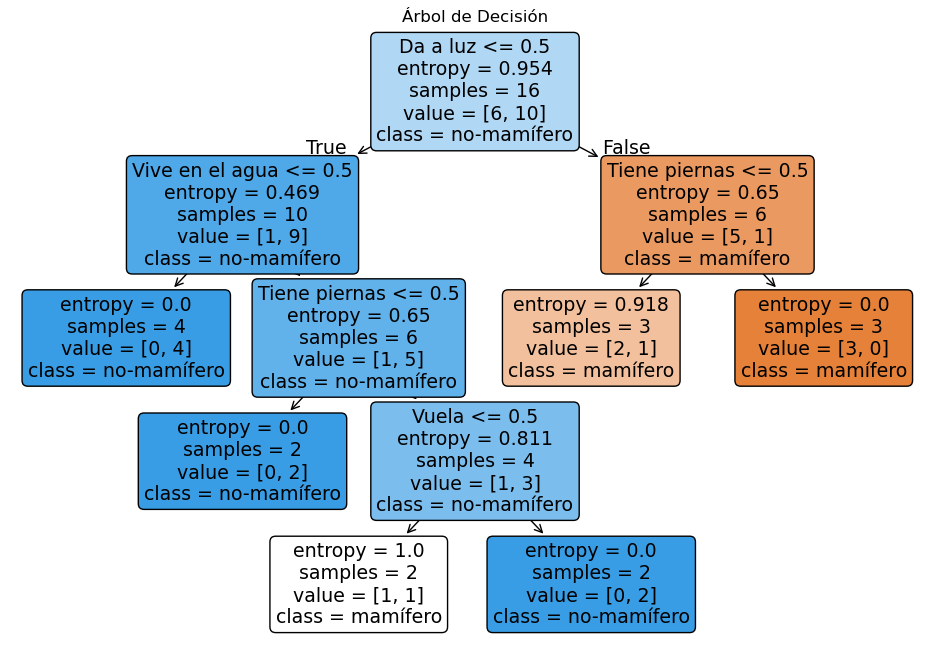

In [474]:
from sklearn import tree
plt.figure(figsize=(12, 8))
tree.plot_tree(tree_model, feature_names=X_encoded.columns, class_names=tree_model.classes_, filled=True, rounded=True)
plt.title("Árbol de Decisión")
plt.show()

Característica: Da a luz, Importancia: 0.07510623422860536
Característica: Vuela, Importancia: 0.11840108433723076
Característica: Vive en el agua, Importancia: 0.17119240963938426
Característica: Tiene piernas, Importancia: 0.6353002717947795


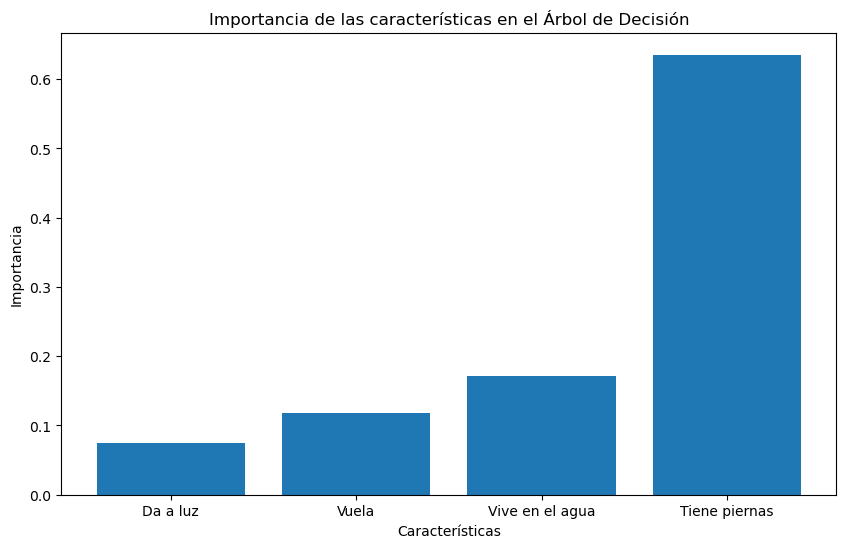

In [475]:

importancias = tree_model.feature_importances_
importancias.sort()

# Imprime las importancias de las características
for feature, importance in zip(X.columns, importancias):
    print(f"Característica: {feature}, Importancia: {importance}")

plt.figure(figsize=(10, 6))
plt.bar(X.columns, importancias)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características en el Árbol de Decisión')
plt.show()

## Predicción con nuevas instancias

In [476]:
nueva_obs_dict = {
    "Da a luz": "sí",
    "Vuela": "no",
    "Vive en el agua": "sí",
    "Tiene piernas": "no"
}

nueva_obs_df = pd.DataFrame([nueva_obs_dict])

nueva_obs_df = my_encoder.transform(nueva_obs_df)

nueva_obs_df = nueva_obs_df[X_encoded.columns]

proba = tree_model.predict_proba(nueva_obs_df)


clase_mamifero_index = list(tree_model.classes_).index("mamífero")
p_mamifero = proba[0][clase_mamifero_index]

print("Probabilidad de que sea mamífero:", p_mamifero)


Probabilidad de que sea mamífero: 0.6666666666666666


In [477]:
from sklearn.model_selection import cross_val_score
# Usar X_encoded en lugar de X para evitar el error con strings
scores = cross_val_score(tree_model, X_encoded, y,
                         scoring="accuracy",
                         cv=5, n_jobs=-1)  #cv es k
print("Scores de cada fold:", scores)
print("Accuracy promedio:", np.mean(scores))
print("Desviación estándar:", np.std(scores))

Scores de cada fold: [1.   0.75 0.75 0.75 0.75]
Accuracy promedio: 0.8
Desviación estándar: 0.09999999999999999
